In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler


## With SMOTE (Synthetic Minority Oversampling Technique) with Evaluation

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


## splite data

In [3]:


df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
sm = SMOTE(random_state = 42)
x_smote, y_smote= sm.fit_resample(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

## Random forest

In [8]:


# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train2, y_train2)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_
params = {
    'n_estimators': 300,  
    'max_depth': 30,       
    'min_samples_split': 6,   
    'min_samples_leaf': 1,    
    'max_features': 'sqrt'
}

gb_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features']
)
gb_clf.fit(x_train2, y_train2)

# Predykcje i ocena modelu
ypred_train1 = gb_clf.predict(x_train2)
ypred_test1 = gb_clf.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train1))
print("Test Results\n")
print(classification_report(y_test2, ypred_test1))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test2, ypred_test1)
print("Confusion Matrix:\n", conf_matrix)

# # Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(gb_clf, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    174285
           1       0.99      0.97      0.98    174595

    accuracy                           0.98    348880
   macro avg       0.98      0.98      0.98    348880
weighted avg       0.98      0.98      0.98    348880

Test Results

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     58302
           1       0.98      0.96      0.97     57992

    accuracy                           0.97    116294
   macro avg       0.97      0.97      0.97    116294
weighted avg       0.97      0.97      0.97    116294

Confusion Matrix:
 [[57217  1085]
 [ 2406 55586]]


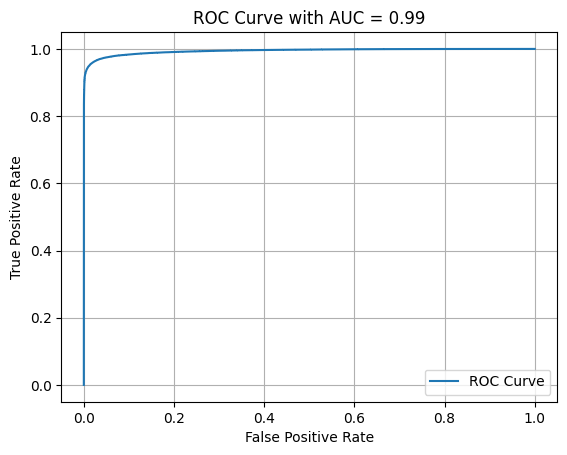

In [9]:

y_proba_test = gb_clf.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:


# # Parametry do przetestowania w Grid Search
# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train2, y_train2)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train2, y_train2)

params = {
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'criterion': 'entropy'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion']
)
best_tree.fit(x_train2, y_train2)

ypred_train2 = best_tree.predict(x_train2)
ypred_test2 = best_tree.predict(x_test2)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train2, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test2, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train2, y_train2, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    174285
           1       1.00      0.98      0.99    174595

    accuracy                           0.99    348880
   macro avg       0.99      0.99      0.99    348880
weighted avg       0.99      0.99      0.99    348880

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     58302
           1       0.97      0.95      0.96     57992

    accuracy                           0.96    116294
   macro avg       0.96      0.96      0.96    116294
weighted avg       0.96      0.96      0.96    116294



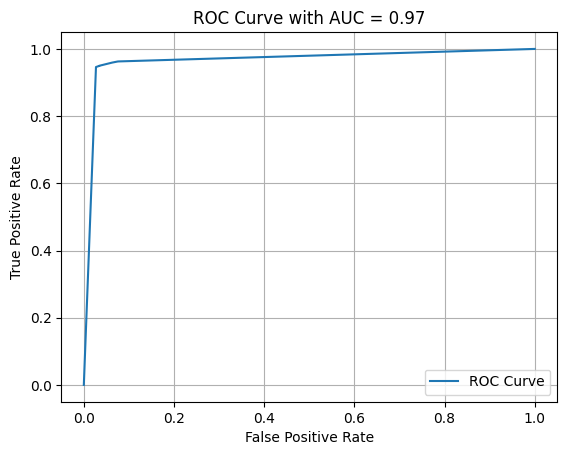

In [11]:


y_proba_test = best_tree.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train2, y_train2)
ypred_train3 = Gnb.predict(x_train2)
y_pred_test3 = Gnb.predict(x_test2)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test2, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.7789395841573942


In [13]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.75      0.83      0.79    174285
           1       0.81      0.73      0.77    174595

    accuracy                           0.78    348880
   macro avg       0.78      0.78      0.78    348880
weighted avg       0.78      0.78      0.78    348880



In [14]:
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     58302
           1       0.81      0.73      0.77     57992

    accuracy                           0.78    116294
   macro avg       0.78      0.78      0.78    116294
weighted avg       0.78      0.78      0.78    116294



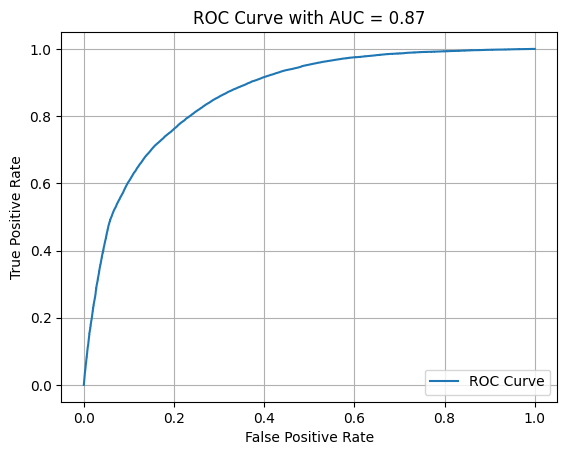

In [15]:
# cross_val_scores = cross_val_score(Gnb, x_train2, y_train2, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = Gnb.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9708897041962853
Accuracy on Test set:  0.9654582351626051

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    174285
           1       0.99      0.95      0.97    174595

    accuracy                           0.97    348880
   macro avg       0.97      0.97      0.97    348880
weighted avg       0.97      0.97      0.97    348880

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     58302
           1       0.98      0.95      0.96     57992

    accuracy                           0.97    116294
   macro avg       0.97      0.97      0.97    116294
weighted avg       0.97      0.97      0.97    116294



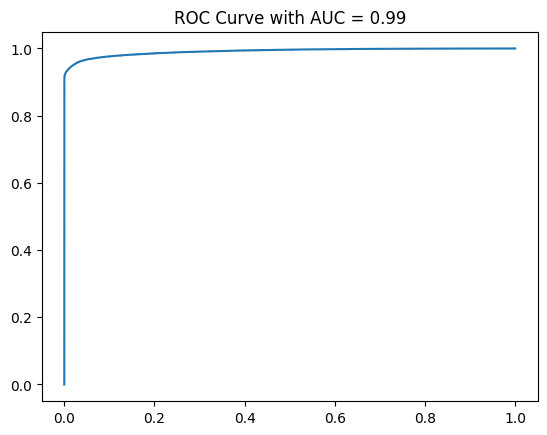

In [16]:


# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree']
)
best_xg.fit(x_train2, y_train2)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train2)
y_pred_test4 = best_xg.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train2, y_train2, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.8115369181380417
Accuracy on Test set:  0.8107125045144203

Training Results

              precision    recall  f1-score   support

           0       0.78      0.86      0.82    174285
           1       0.84      0.76      0.80    174595

    accuracy                           0.81    348880
   macro avg       0.81      0.81      0.81    348880
weighted avg       0.81      0.81      0.81    348880

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     58302
           1       0.84      0.76      0.80     57992

    accuracy                           0.81    116294
   macro avg       0.81      0.81      0.81    116294
weighted avg       0.81      0.81      0.81    116294



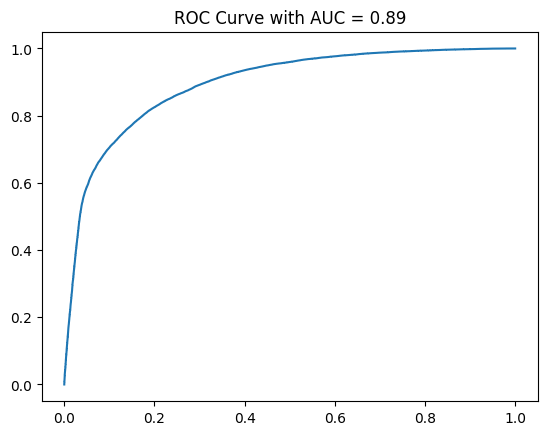

In [17]:


# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 10,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver']
)
best_lg.fit(x_train2, y_train2)
# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train2)
y_pred_test4 = best_lg.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2 ,y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))


# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [18]:
params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

gb_clf = GradientBoostingClassifier(
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_leaf=params['min_samples_leaf'],
    min_samples_split=params['min_samples_split'],
    n_estimators=params['n_estimators'])
gb_clf.fit(x_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300)

Accuracy on Training set:  0.979878468241229
Accuracy on Test set:  0.966825459610986

Training Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    174285
           1       0.99      0.97      0.98    174595

    accuracy                           0.98    348880
   macro avg       0.98      0.98      0.98    348880
weighted avg       0.98      0.98      0.98    348880

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     58302
           1       0.98      0.95      0.97     57992

    accuracy                           0.97    116294
   macro avg       0.97      0.97      0.97    116294
weighted avg       0.97      0.97      0.97    116294



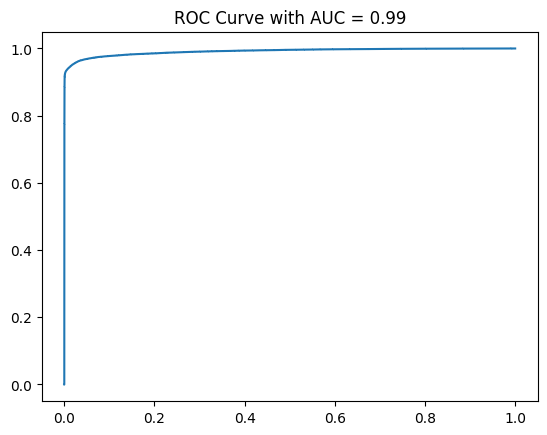

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_


# Predykcje na zbiorze treningowym i testowym
ypred_train6 = gb_clf.predict(x_train2)
y_pred_test6 = gb_clf.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test6))

# cross_val_scores = cross_val_score(gb_clf, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))


# Krzywa ROC
y_proba_test6 = gb_clf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train2)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train2, 
            y_train2)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.9574344731148156

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train33 = grid_cv.predict(x_train2)
y_pred_test33 = grid_cv.predict(x_test2)
print("XGBClassifier Accuracy: ",accuracy_score(y_test2, y_pred_test33))

XGBClassifier Accuracy:  0.9625002149723976


In [26]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train33))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174285
           1       1.00      1.00      1.00    174595

    accuracy                           1.00    348880
   macro avg       1.00      1.00      1.00    348880
weighted avg       1.00      1.00      1.00    348880



In [27]:
print("Training Results\n")
print(classification_report(y_test2, y_pred_test33))

Training Results

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     58302
           1       0.95      0.98      0.96     57992

    accuracy                           0.96    116294
   macro avg       0.96      0.96      0.96    116294
weighted avg       0.96      0.96      0.96    116294



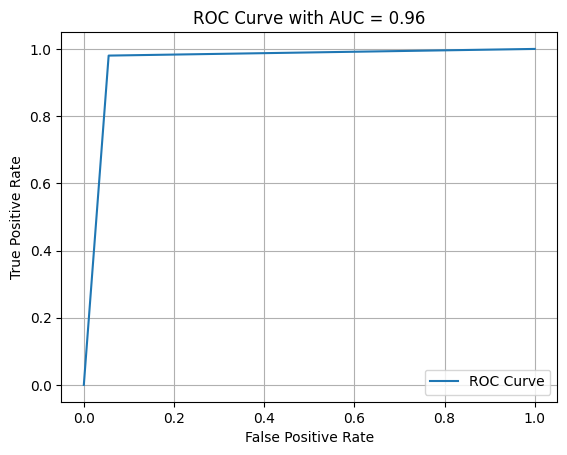

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = grid_cv.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## inne próby sieci neuronowych 

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train2)
X_test_scaled = scaler.transform(x_test2)
tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train2,y_train2,epochs = 10)

Epoch 1/10



10903/10903 [==============================] - 13s 1ms/step - loss: 0.3640 - accuracy: 0.8408
Epoch 2/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2964 - accuracy: 0.8784
Epoch 3/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2736 - accuracy: 0.8903
Epoch 4/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2647 - accuracy: 0.8946
Epoch 5/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2590 - accuracy: 0.8980
Epoch 6/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2528 - accuracy: 0.9008
Epoch 7/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2484 - accuracy: 0.9034
Epoch 8/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2434 - accuracy: 0.9061
Epoch 9/10
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2402 - accuracy: 0.9081
Epoch 10/10
10903/10903 [==============================] - 12s 1ms

In [31]:
model_2.evaluate(x_test2,y_test2)

3635/3635 [==============================] - 4s 936us/step - loss: 0.2302 - accuracy: 0.9121


[0.23015113174915314, 0.9121021032333374]

In [32]:
ypred_train7 = model_2.predict(x_train2)
y_pred_test7 = model_2.predict(x_test2)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)

print(classification_report(y_train2,ypred_train7))
print(classification_report(y_test2,y_pred_test7))

3635/3635 [==============================] - 3s 847us/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91    174285
           1       0.93      0.89      0.91    174595

    accuracy                           0.91    348880
   macro avg       0.91      0.91      0.91    348880
weighted avg       0.91      0.91      0.91    348880

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     58302
           1       0.93      0.89      0.91     57992

    accuracy                           0.91    116294
   macro avg       0.91      0.91      0.91    116294
weighted avg       0.91      0.91      0.91    116294



3635/3635 [==============================] - 3s 904us/step


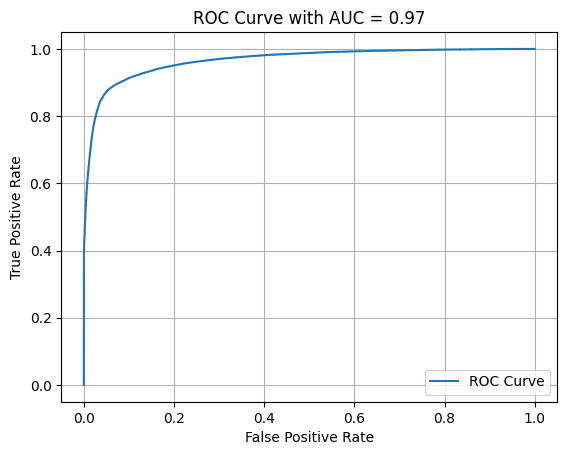

In [33]:
# cross_val_scores = cross_val_score(model_2, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model_2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [34]:

tf.random.set_seed(42)



model_21 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_21.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_21.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3525 - accuracy: 0.8467
Epoch 2/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2639 - accuracy: 0.8957
Epoch 3/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2346 - accuracy: 0.9105
Epoch 4/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2216 - accuracy: 0.9163
Epoch 5/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2163 - accuracy: 0.9183
Epoch 6/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2121 - accuracy: 0.9203
Epoch 7/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2105 - accuracy: 0.9211
Epoch 8/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2076 - accuracy: 0.9219
Epoch 9/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2067 - accuracy: 0.9224
Epoch 10/100
10903/10903 [====================

In [35]:
model_21.evaluate(x_test2,y_test2)

3635/3635 [==============================] - 3s 906us/step - loss: 0.1825 - accuracy: 0.9298


[0.18251898884773254, 0.929781436920166]

In [36]:
ypred_train8 = model_21.predict(x_train2)
y_pred_test8 = model_21.predict(x_test2)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)

print(classification_report(y_train2,ypred_train8))
print(classification_report(y_test2,y_pred_test8))

3635/3635 [==============================] - 3s 786us/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    174285
           1       0.97      0.89      0.93    174595

    accuracy                           0.93    348880
   macro avg       0.93      0.93      0.93    348880
weighted avg       0.93      0.93      0.93    348880

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     58302
           1       0.97      0.89      0.93     57992

    accuracy                           0.93    116294
   macro avg       0.93      0.93      0.93    116294
weighted avg       0.93      0.93      0.93    116294



3635/3635 [==============================] - 3s 818us/step


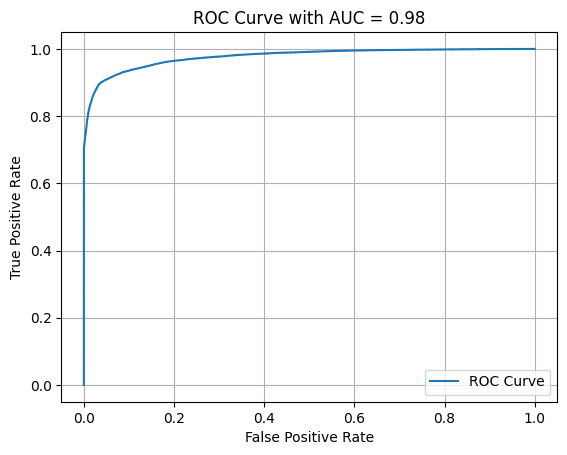

In [37]:
# cross_val_scores = cross_val_score(model_21, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_21.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [38]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3243 - accuracy: 0.8631
Epoch 2/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2483 - accuracy: 0.9032
Epoch 3/100
10903/10903 [==============================] - 11s 1ms/step - loss: 0.2267 - accuracy: 0.9136
Epoch 4/100
10903/10903 [==============================] - 11s 1ms/step - loss: 0.2157 - accuracy: 0.9184
Epoch 5/100
10903/10903 [==============================] - 11s 1ms/step - loss: 0.2085 - accuracy: 0.9213
Epoch 6/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.2022 - accuracy: 0.9235
Epoch 7/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.1984 - accuracy: 0.9249
Epoch 8/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.1947 - accuracy: 0.9258
Epoch 9/100
10903/10903 [==============================] - 12s 1ms/step - loss: 0.1909 - accuracy: 0.9274
Epoch 10/100
10903/10903 [====================

In [39]:
model_22.evaluate(x_test2,y_test2)

3635/3635 [==============================] - 3s 893us/step - loss: 0.1579 - accuracy: 0.9411


[0.1579267531633377, 0.9410545825958252]

In [40]:
ypred_train9 = model_22.predict(x_train2)
y_pred_test9 = model_22.predict(x_test2)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train2,ypred_train9))
print(classification_report(y_test2,y_pred_test9))

3635/3635 [==============================] - 3s 800us/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    174285
           1       0.96      0.92      0.94    174595

    accuracy                           0.94    348880
   macro avg       0.94      0.94      0.94    348880
weighted avg       0.94      0.94      0.94    348880

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     58302
           1       0.96      0.92      0.94     57992

    accuracy                           0.94    116294
   macro avg       0.94      0.94      0.94    116294
weighted avg       0.94      0.94      0.94    116294



3635/3635 [==============================] - 3s 856us/step


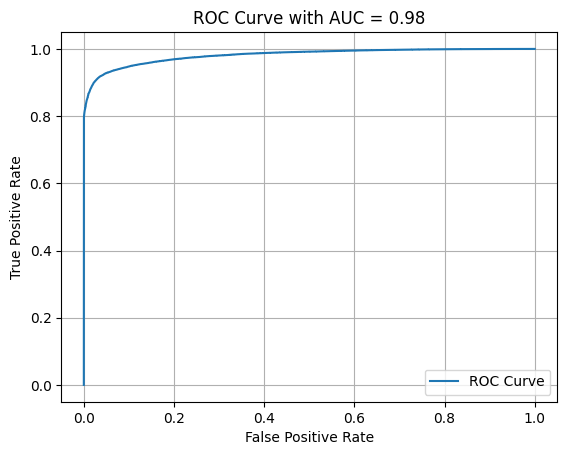

In [41]:
# cross_val_scores = cross_val_score(model_22, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_22.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [42]:
model1 = Sequential()
model1.add(Dense(units=20,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model1.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.4570 - val_loss: 0.3711
Epoch 2/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.4179 - val_loss: 0.3567
Epoch 3/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.4012 - val_loss: 0.3512
Epoch 4/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3962 - val_loss: 0.3471
Epoch 5/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3937 - val_loss: 0.3434
Epoch 6/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3912 - val_loss: 0.3416
Epoch 7/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3895 - val_loss: 0.3436
Epoch 8/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3888 - val_loss: 0.3408
Epoch 9/100
10903/10903 [==============================] - 15s 1ms/step - loss: 0.3876 - val_loss: 0.3381
Epoch 10/100
10903/10903 [====================

In [44]:
ypred_train10 = model1.predict(x_train2)
y_pred_test10 = model1.predict(x_test2)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)




3635/3635 [==============================] - 3s 741us/step


In [45]:
print('trening Results\n')
print(classification_report(y_train2,ypred_train10))

trening Results

              precision    recall  f1-score   support

           0       0.81      0.93      0.87    174285
           1       0.92      0.78      0.84    174595

    accuracy                           0.86    348880
   macro avg       0.86      0.86      0.85    348880
weighted avg       0.86      0.86      0.85    348880



In [46]:
print('Testing Results\n')
print(classification_report(y_test2,y_pred_test10))

Testing Results

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     58302
           1       0.92      0.78      0.84     57992

    accuracy                           0.85    116294
   macro avg       0.86      0.85      0.85    116294
weighted avg       0.86      0.85      0.85    116294



3635/3635 [==============================] - 3s 793us/step


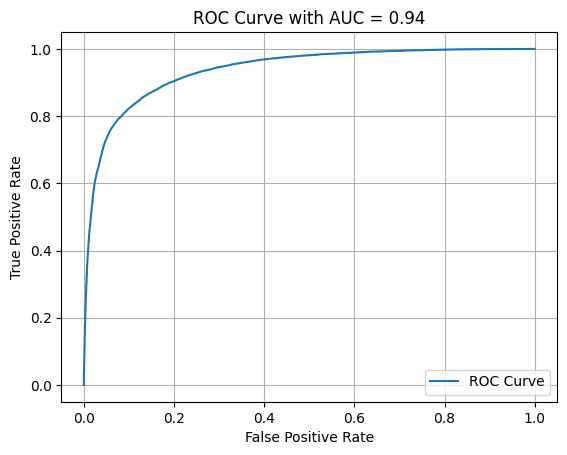

In [47]:
# cross_val_scores = cross_val_score(model1, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model1.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [48]:
model2 = Sequential()



model2.add(Dense(20,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model2.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10903/10903 [==============================] - 14s 1ms/step - loss: 0.4099 - val_loss: 0.3479
Epoch 2/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3606 - val_loss: 0.3178
Epoch 3/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3459 - val_loss: 0.3075
Epoch 4/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3400 - val_loss: 0.3031
Epoch 5/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3352 - val_loss: 0.3003
Epoch 6/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3321 - val_loss: 0.2939
Epoch 7/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3302 - val_loss: 0.2936
Epoch 8/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3285 - val_loss: 0.2944
Epoch 9/100
10903/10903 [==============================] - 13s 1ms/step - loss: 0.3267 - val_loss: 0.2871
Epoch 10/100
10903/10903 [====================

In [50]:
ypred_train11 = model2.predict(x_train2)
y_pred_test11 = model2.predict(x_test2)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train2,ypred_train11))
print(classification_report(y_test2,y_pred_test11))

3635/3635 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.95      0.90    174285
           1       0.94      0.84      0.89    174595

    accuracy                           0.90    348880
   macro avg       0.90      0.90      0.90    348880
weighted avg       0.90      0.90      0.90    348880

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     58302
           1       0.94      0.84      0.89     57992

    accuracy                           0.90    116294
   macro avg       0.90      0.90      0.90    116294
weighted avg       0.90      0.90      0.90    116294



3635/3635 [==============================] - 5s 1ms/step


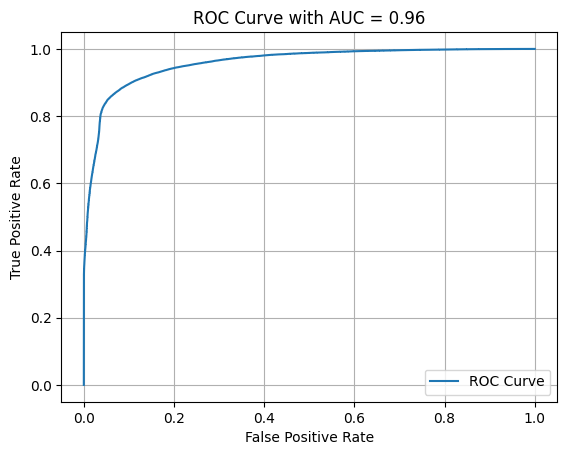

In [51]:
# cross_val_scores = cross_val_score(model2, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

Training Results

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    174285
           1       0.95      0.87      0.91    174595

    accuracy                           0.91    348880
   macro avg       0.92      0.91      0.91    348880
weighted avg       0.92      0.91      0.91    348880

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     58302
           1       0.95      0.87      0.91     57992

    accuracy                           0.91    116294
   macro avg       0.91      0.91      0.91    116294
weighted avg       0.91      0.91      0.91    116294



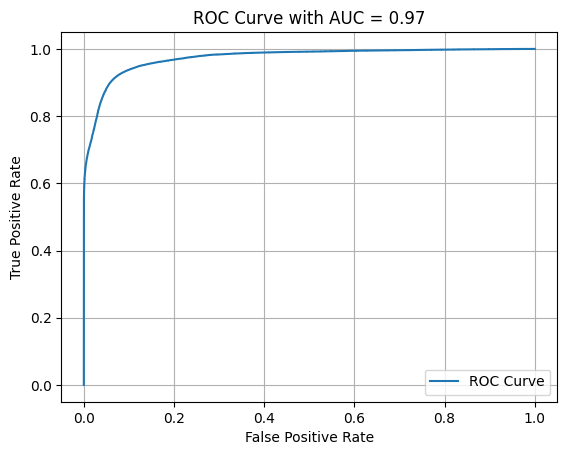

In [52]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train2, y_train2)

ypred_train14 = model3.predict(x_train2)
y_pred_test14 = model3.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test2, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [53]:
# model3 = SVC(probability=True)

In [54]:
# model3.fit(x_train2,y_train2)

In [55]:
# ypred_train12 = model3.predict(x_train2)
# y_pred_test12 = model3.predict(x_test2)


# print(classification_report(y_train2,ypred_train12))
# print(classification_report(y_test2,y_pred_test12))

In [56]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [57]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [58]:
# grid.fit(x_train2,y_train2)

In [59]:
# grid.best_params_

In [60]:
# grid.best_estimator_

In [61]:
# ypred_train = grid.predict(x_train2)
# y_pred_test = grid.predict(x_test2)


# print(classification_report(y_train2,ypred_train))
# print(classification_report(y_test2,y_pred_test))

In [62]:


# y_proba_test = grid.predict_proba(x_test2)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()